# Example Poincare BC

In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../../"))

from desc.objectives import (
    ObjectiveFunction,
    ForceBalance
)
from desc.basis import ZernikePolynomial, FourierZernikeBasis,FourierZernike_to_FourierZernike_no_N_modes,FourierZernike_to_PoincareZernikePolynomial
from desc.transform import Transform
from desc.plotting import plot_1d,plot_2d,plot_3d,plot_comparison, plot_section, plot_fsa, plot_surfaces
from desc.optimize import Optimizer
from desc.perturbations import perturb,optimal_perturb
import numpy as np
from desc.geometry import ZernikeRZToroidalSection
%matplotlib inline
from desc.utils import copy_coeffs
import matplotlib.pyplot as plt
from desc.examples import get
from desc.objectives.getters import get_fixed_boundary_constraints
from desc.grid import LinearGrid
import plotly.graph_objects as go


DESC version 0.10.4+1020.g0e6f84d88,using JAX backend, jax version=0.4.25, jaxlib version=0.4.25, dtype=float64
Using device: CPU, with 11.64 GB available memory


ImportError: cannot import name 'FourierZernike_to_PoincareZernikePolynomial' from 'desc.basis' (/home/yigit/Codes/DESC/desc/basis.py)

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 1.33 sec
Timer: Objective build = 3.30 sec
Timer: Linear constraint projection build = 6.74 sec
Compiling objective function and derivatives: ['force']
Timer: Objective compilation time = 1.51 sec
Timer: Jacobian compilation time = 5.69 sec
Timer: Total compilation time = 7.21 sec
Number of parameters: 1274
Number of objectives: 4940
Starting optimization
Using method: lsq-exact
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1          6.325e-01                                    4.118e+01   
       1              5          4.989e-01      1.336e-01      1.030e-01      1.316e+02   
       2              6          3.577e-01      1.412e-01      1.256e-01      3.683e+01   
         Current function value: 3.577e-01
         Total delta_x: 1.971e-01
         Iterations: 2
         Function evaluations: 6
         Jacobian evaluations: 3
Timer

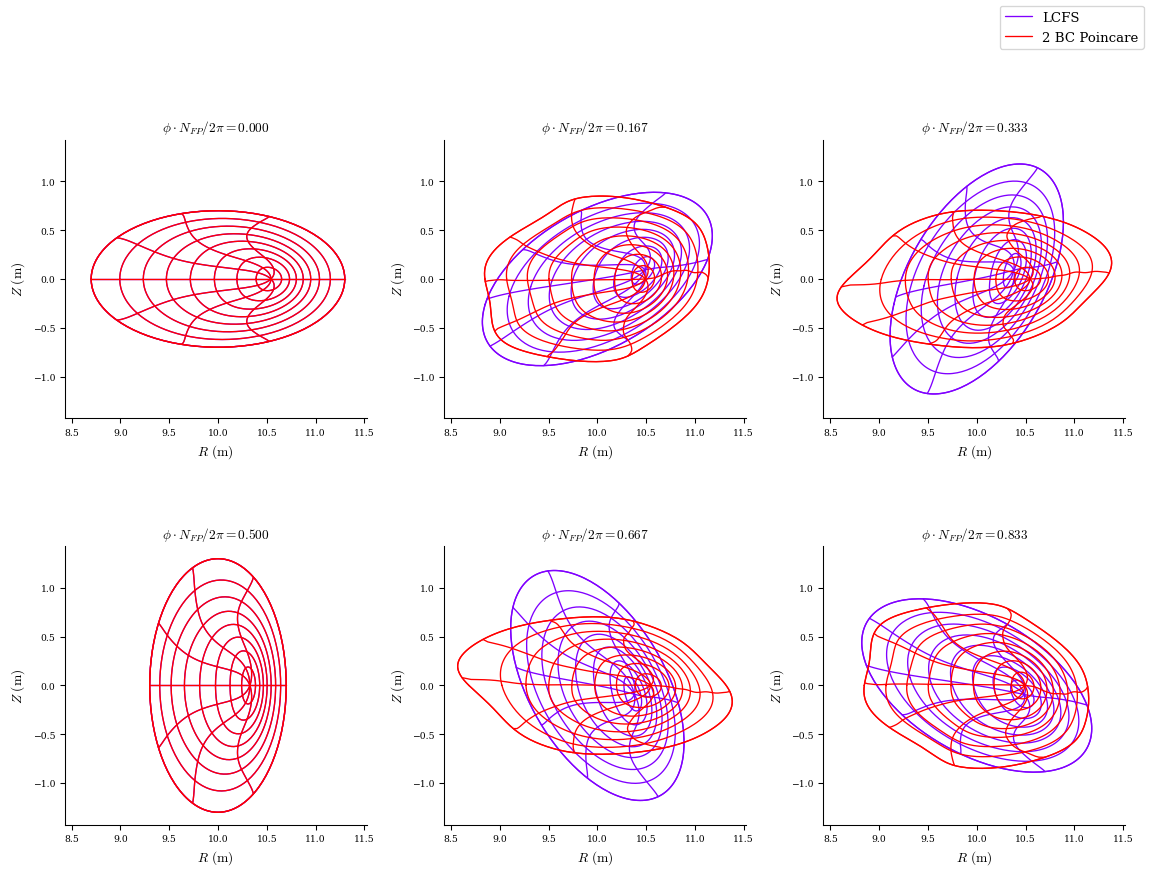

In [5]:
eq = get("HELIOTRON")
zeta = 0
zeta2 = np.pi

# Take second surface to be fixed
surface2 = eq.get_surface_at(zeta=zeta2/eq.NFP)
surface2.change_resolution(eq.L,eq.M,eq.N)

eq_poin = eq.set_poincare_equilibrium(zeta=zeta)
eq_poin.change_resolution(eq_poin.L,eq_poin.M,eq.N) 

Lb2_lmn, Lb2_basis = FourierZernike_to_FourierZernike_no_N_modes(eq.L_lmn, eq.L_basis, zeta=zeta2)

constraints = get_fixed_boundary_constraints(eq=eq_poin,poincare_lambda=True, zeta=zeta)
constraints += (
    SecondBoundaryRSelfConsistency(eq=eq_poin, zeta=zeta2, surface=surface2), 
    SecondBoundaryZSelfConsistency(eq=eq_poin, zeta=zeta2, surface=surface2),
    SecondBoundaryLambdaSelfConsistency(eq=eq_poin, zeta=zeta2, Lb2_lmn=Lb2_lmn, Lb2_basis=Lb2_basis),
    )
objective = ObjectiveFunction(ForceBalance(eq_poin))
optimizer = Optimizer("lsq-exact")

eq_poin.solve(
    verbose=3, 
    ftol=0, 
    objective=objective, 
    constraints=constraints, 
    optimizer=optimizer,
    maxiter=2, 
    xtol=0,
    zeta=zeta, 
    )
plot_comparison(eqs=[eq,eq_poin],labels=['LCFS',f'2 BC Poincare']);

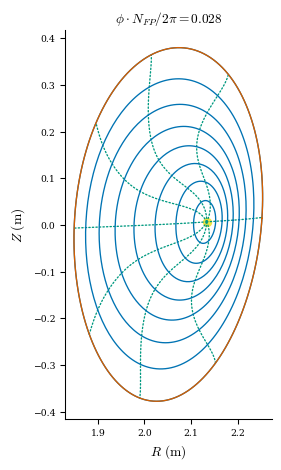

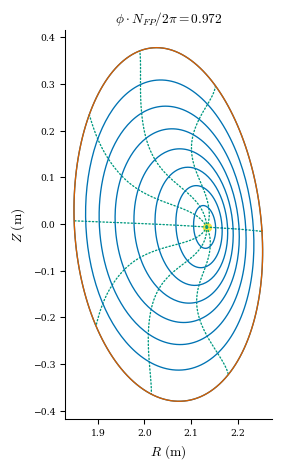

In [15]:
eq = get("ATF")
# plot_surfaces(eq);
plot_surfaces(eq, phi=10/360*2*np.pi/eq.NFP);
plot_surfaces(eq, phi=350/360*2*np.pi/eq.NFP);

In [8]:
zeta = 10/360* 2*np.pi
surface = eq.get_surface_at(zeta=zeta)

modes = surface.Z_basis.modes
coeff = surface.Z_lmn
new_coef = np.empty([modes.shape[0], modes.shape[1]+1])
new_coef[:,:3] = modes
new_coef[:,3] = coeff
for row in new_coef:
    print('{:}{:<{w}.0f} {:}{:<{w}.0f} {:}{:<{w}.0f} {:}{:>{w2}.8f}'.format('l = ', row[0], 'm = ', row[1], 'n = ', row[2], 'R_lmn = ', row[3],w=4, w2=12))

l = 1    m = -1   n = 0    R_lmn =  -0.23991870
l = 2    m = -2   n = 0    R_lmn =  -0.02056023
l = 3    m = -3   n = 0    R_lmn =  -0.00468508
l = 3    m = -1   n = 0    R_lmn =  -0.00465221
l = 4    m = -4   n = 0    R_lmn =  -0.00184374
l = 4    m = -2   n = 0    R_lmn =   0.01723004
l = 5    m = -5   n = 0    R_lmn =  -0.00027858
l = 5    m = -3   n = 0    R_lmn =   0.00395649
l = 5    m = -1   n = 0    R_lmn =  -0.00255678
l = 6    m = -6   n = 0    R_lmn =   0.00011913
l = 6    m = -4   n = 0    R_lmn =   0.00201357
l = 6    m = -2   n = 0    R_lmn =  -0.00876220
l = 7    m = -7   n = 0    R_lmn =  -0.00001084
l = 7    m = -5   n = 0    R_lmn =   0.00022808
l = 7    m = -3   n = 0    R_lmn =   0.00035049
l = 7    m = -1   n = 0    R_lmn =   0.00432655
l = 8    m = -8   n = 0    R_lmn =  -0.00002462
l = 8    m = -6   n = 0    R_lmn =   0.00003673
l = 8    m = -4   n = 0    R_lmn =  -0.00007792
l = 8    m = -2   n = 0    R_lmn =   0.00144332
l = 9    m = -9   n = 0    R_lmn =  -0.0

In [9]:
zeta = 350/360* 2*np.pi
surface = eq.get_surface_at(zeta=zeta)

modes = surface.Z_basis.modes
coeff = surface.Z_lmn
new_coef = np.empty([modes.shape[0], modes.shape[1]+1])
new_coef[:,:3] = modes
new_coef[:,3] = coeff
for row in new_coef:
    print('{:}{:<{w}.0f} {:}{:<{w}.0f} {:}{:<{w}.0f} {:}{:>{w2}.8f}'.format('l = ', row[0], 'm = ', row[1], 'n = ', row[2], 'R_lmn = ', row[3],w=4, w2=12))

l = 1    m = -1   n = 0    R_lmn =  -0.23991870
l = 2    m = -2   n = 0    R_lmn =  -0.02056023
l = 3    m = -3   n = 0    R_lmn =  -0.00468508
l = 3    m = -1   n = 0    R_lmn =  -0.00465221
l = 4    m = -4   n = 0    R_lmn =  -0.00184374
l = 4    m = -2   n = 0    R_lmn =   0.01723004
l = 5    m = -5   n = 0    R_lmn =  -0.00027858
l = 5    m = -3   n = 0    R_lmn =   0.00395649
l = 5    m = -1   n = 0    R_lmn =  -0.00255678
l = 6    m = -6   n = 0    R_lmn =   0.00011913
l = 6    m = -4   n = 0    R_lmn =   0.00201357
l = 6    m = -2   n = 0    R_lmn =  -0.00876220
l = 7    m = -7   n = 0    R_lmn =  -0.00001084
l = 7    m = -5   n = 0    R_lmn =   0.00022808
l = 7    m = -3   n = 0    R_lmn =   0.00035049
l = 7    m = -1   n = 0    R_lmn =   0.00432655
l = 8    m = -8   n = 0    R_lmn =  -0.00002462
l = 8    m = -6   n = 0    R_lmn =   0.00003673
l = 8    m = -4   n = 0    R_lmn =  -0.00007792
l = 8    m = -2   n = 0    R_lmn =   0.00144332
l = 9    m = -9   n = 0    R_lmn =  -0.0

In [ ]:
fig = go.Figure()
grid = LinearGrid(
        rho=1,
        theta=np.linspace(0, 2 * np.pi, 300),
        zeta=np.linspace(0, 2 * np.pi/eq_poin.NFP, 300),
        axis=True,
    )
plot_3d(eq_poin,"|B|",fig=fig, grid=grid)
plot_3d(eq,"|B|",fig=fig, grid=grid)